In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\Data_Master_Sheet_byDate1.xlsx', sheet_name='Sheet1')
df.head()

,exp,sample,trt_time,orient,spectra_num,details,752.901,754.044,755.187,756.329,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,20250616,Ctrl,20mins,Orth,1,0616-Ctrl-20mins-Orth,-0.004580,0.014198,0.033234,0.052258,...,0.063764,0.060871,0.058869,0.058241,0.058690,0.060554,0.064038,0.069348,0.076688,0.086265
1,20250616,Ctrl,20mins,Orth,2,0616-Ctrl-20mins-Orth,-0.002485,0.054030,0.099156,0.134131,...,0.089793,0.091843,0.094528,0.097768,0.101272,0.104856,0.108352,0.111590,0.114402,0.116619
2,20250616,Ctrl,20mins,Orth,3,0616-Ctrl-20mins-Orth,-0.006735,0.049518,0.097465,0.137848,...,0.305150,0.310110,0.314895,0.319764,0.324469,0.329269,0.334224,0.339393,0.344836,0.350614
3,20250616,Ctrl,20mins,Orth,4,0616-Ctrl-20mins-Orth,0.016831,0.032360,0.041923,0.046839,...,0.140087,0.142750,0.144948,0.146399,0.147567,0.148977,0.150814,0.153261,0.156503,0.160724
4,20250616,Ctrl,20mins,Orth,5,0616-Ctrl-20mins-Orth,-0.002913,0.041236,0.079787,0.113092,...,0.222366,0.224526,0.226351,0.227929,0.229314,0.230770,0.232435,0.234444,0.236937,0.240051


In [461]:
dff = df[(df['orient'] == 'Orth') & (df['trt_time'].str.contains('24h') == False )]

In [462]:
w_num = dff.columns[6:]
endmember = dff.groupby('sample').mean(numeric_only = True).iloc[:, 2:].T.values
endmember

array([[0.01513046, 0.01705682],
       [0.04310832, 0.04777478],
       [0.06818206, 0.07485645],
       ...,
       [0.15012474, 0.18273684],
       [0.15082529, 0.18316573],
       [0.15148774, 0.18371535]])

In [463]:
dffm = dff.groupby(['sample', 'trt_time']).mean(numeric_only = True).reset_index()
dffm

,sample,trt_time,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,758.613,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,20mins,2.025055e+07,4.900000,0.014324,0.047562,0.076111,0.100397,0.120848,0.137891,...,0.135084,0.135973,0.136873,0.137851,0.138958,0.140152,0.141424,0.142772,0.144197,0.145697
1,Ctrl,2mins,2.025056e+07,7.181818,0.026375,0.048292,0.068571,0.087194,0.104145,0.119403,...,0.116270,0.117292,0.118188,0.118877,0.119464,0.120035,0.120635,0.121299,0.122066,0.122974
2,Ctrl,40mins,2.025055e+07,5.166667,0.008802,0.037368,0.063080,0.086106,0.106615,0.124778,...,0.159485,0.161184,0.162752,0.164169,0.165447,0.166601,0.167558,0.168289,0.168767,0.168965
3,Ctrl,60mins,2.025056e+07,5.161290,0.010065,0.038835,0.065033,0.088729,0.109994,0.128898,...,0.164626,0.166049,0.167237,0.168288,0.169097,0.169669,0.170080,0.170347,0.170492,0.170532
4,Trt,20mins,2.025056e+07,4.774194,0.012439,0.043091,0.070431,0.094695,0.116115,0.134926,...,0.185363,0.186407,0.187210,0.187849,0.188356,0.188859,0.189333,0.189803,0.190291,0.190820
5,Trt,2mins,2.025056e+07,4.937500,0.021626,0.049500,0.074410,0.096493,0.115883,0.132719,...,0.144199,0.146276,0.147999,0.149419,0.150325,0.150701,0.150864,0.150896,0.150878,0.150892
6,Trt,40mins,2.025056e+07,4.774194,0.021271,0.058766,0.090340,0.116562,0.138002,0.155229,...,0.186920,0.187365,0.187595,0.187749,0.187849,0.187985,0.188237,0.188673,0.189361,0.190367
7,Trt,60mins,2.025056e+07,4.774194,0.012744,0.039686,0.064258,0.086537,0.106601,0.124526,...,0.196700,0.198247,0.199470,0.200316,0.200973,0.201548,0.202076,0.202602,0.203175,0.203841


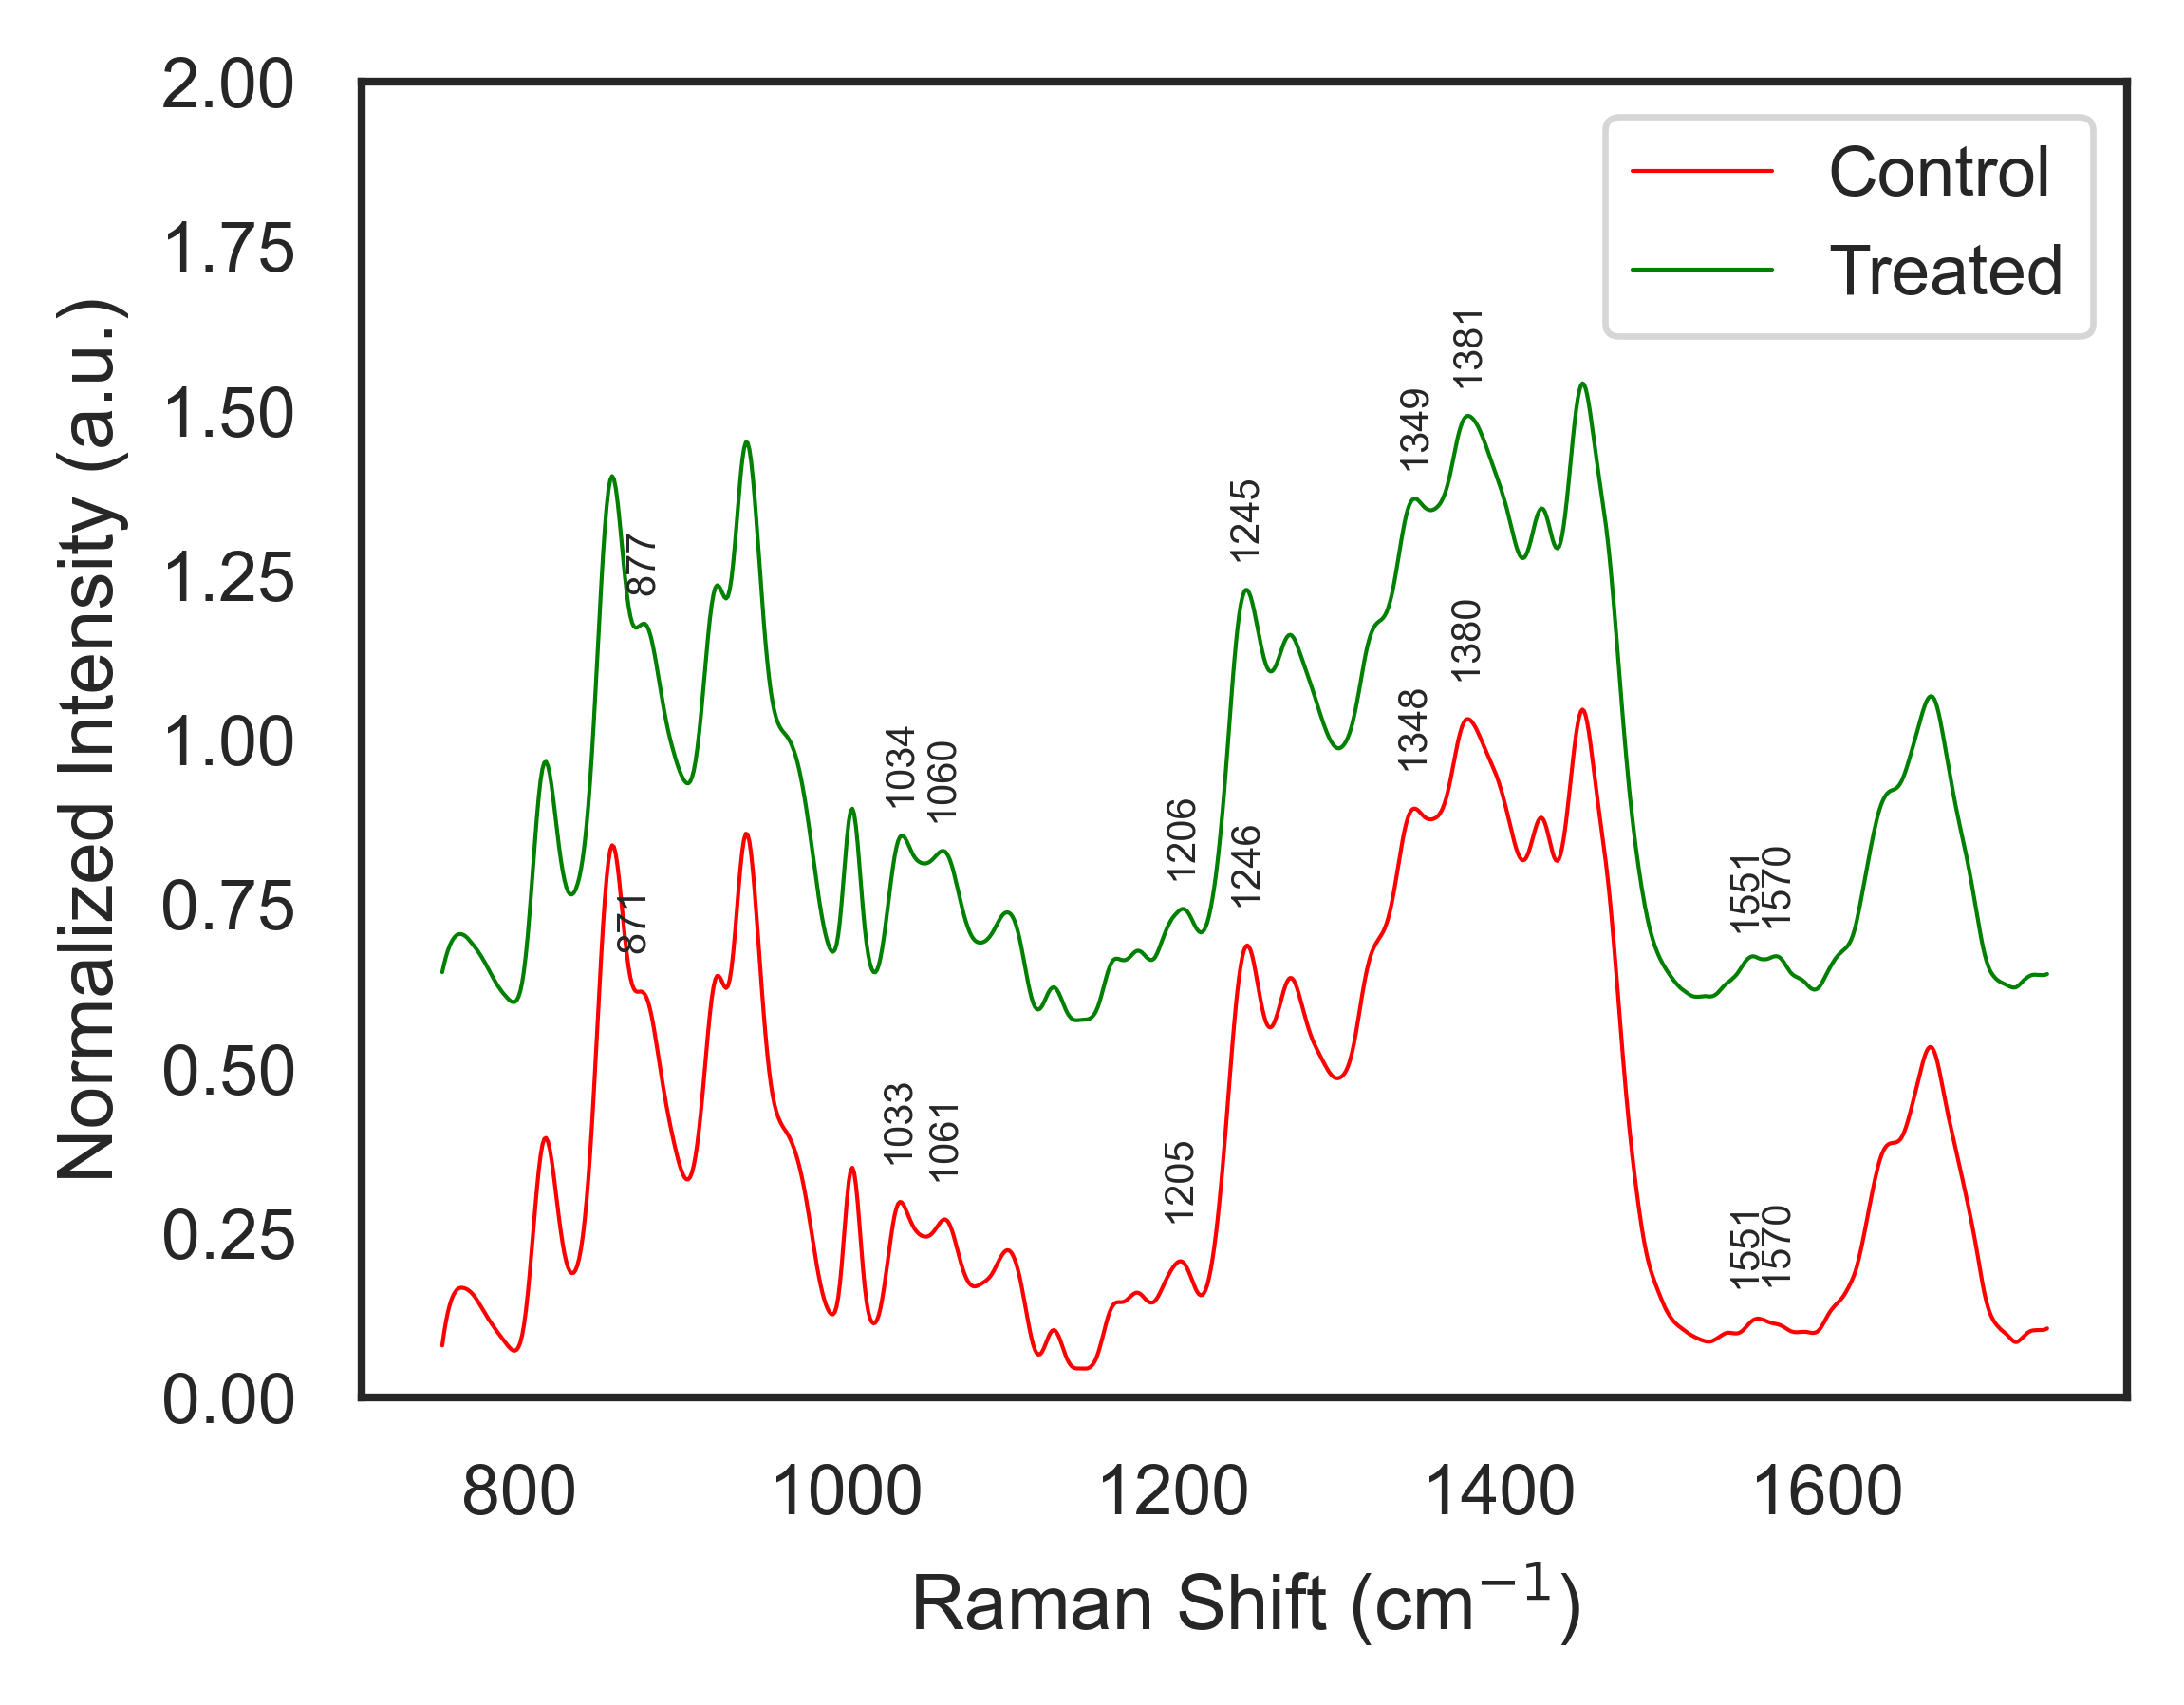

In [358]:
plt.figure(figsize = (4, 3), dpi = 600)
sns.lineplot(
            x = w_num,
            y = dff.groupby('sample').mean(numeric_only = True).iloc[0, 2:].values,
            label = 'Control',
            color = 'red',
            lw = .5
        )
sns.lineplot(
            x = w_num,
            y = dff.groupby('sample').mean(numeric_only = True).iloc[1, 2:].values  + .5,
            label = 'Treated',
            color = 'green',
            lw = .5
        )
plt.ylim(0, 2)
plt.xlabel("Raman Shift (cm$^{-1}$)")
plt.ylabel("Normalized Intensity (a.u.)")
ctrs = [876, 1245, 1381, 1033, 1062, 1207, 1344, 1545, 1575,]
    #orth: [1033, 1062, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]#816, 857, 876, 921,  1003, 1321,857,940, 975,1100, 1127, 1245, 1270,  1381, 1426, 
    #para: [876, 1321,1245, 1270,  1381, 1033, 1062, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]
for c in ctrs:
    for b in range(2):
        mask = (dffm.columns[2:] >= c - 5) & (dffm.columns[2:] <= c + 6)

        loc_idx = dffm.columns[2:][mask]
        peak_idx = dffm.iloc[b, 2:][mask]

        idx_max = np.argmax(peak_idx)
        peak_wl = loc_idx[idx_max]
        int_val = peak_idx.values[idx_max]
                    #print(int_val)
        if b == 0:
                plt.text(peak_wl + 10, int_val + .07,#.3 * (len(dffm) + 0.3),
                        f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')
        else:
                plt.text(peak_wl+10, int_val + b/1.8,#.5 * (len(dffm) + 0.3),
                            f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')

In [431]:
print(X.shape)
print(endmember.shape)
print(fitted.shape)

(249, 976)
(976, 2)
(249, 976)


In [464]:
X = dff.iloc[:, 6:].values
n_samples = X.shape[0]

coeffs = np.zeros((n_samples, 2))
fitted = np.zeros_like(X)
residuals = np.zeros_like(X)
rmse = np.zeros(n_samples)

output = []
#fitt  =[]
for i in range(n_samples):
    spectrum = X[i, :]

    c, rnorm = nnls(endmember, spectrum)

    coeffs[i, :] = c
    fitted[i, :] = endmember @ c
    residuals[i, :] = spectrum - fitted[i, :]
    rmse[i] = np.sqrt(np.mean(residuals[i, :] ** 2))
    #print(fitted)

    out = {
        'coeff0': c[0],
        'coeff1': c[1],
        'residual': residuals,
        'fitted_spec': fitted
    }
    #fits = (c[0] * ctrl_mean) + (c[1] *trt_mean)
    output.append(out)
    #fitt.append(fits)


In [465]:
fit_df = pd.DataFrame(output[0]['fitted_spec'])
fit_df.columns = w_num 
fit_df.head()
fitt_df = pd.concat([dff.iloc[:, :6].reset_index(drop=True), fit_df], axis=1)

In [466]:
df_mean1 = fitt_df.groupby(['sample', 'trt_time']).mean(numeric_only=True).reset_index()

In [467]:
ctm = df_mean1.groupby(['sample']).mean(numeric_only=True).reset_index()
ctm.insert(1, 'trt_time', '0min')
ctm

,sample,trt_time,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,758.613,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,0min,2.025056e+07,5.602444,0.015836,0.044741,0.070442,0.093137,0.113025,0.130305,...,0.157550,0.158804,0.159863,0.16076,0.161506,0.162146,0.162733,0.163295,0.163864,0.164467
1,Trt,0min,2.025056e+07,4.815020,0.016533,0.046611,0.073299,0.096813,0.117371,0.135191,...,0.166497,0.167789,0.168861,0.16975,0.170467,0.171065,0.171610,0.172139,0.172688,0.173294


In [468]:
res_df = pd.concat([dff.iloc[:, :6].reset_index(drop=True), pd.DataFrame(output[0]['residual'], columns = w_num)], axis = 1)
res_mean = res_df.groupby(['sample', 'trt_time']).mean(numeric_only=True).reset_index()
res_mean

,sample,trt_time,exp,spectra_num,752.901,754.044,755.187,756.329,757.471,758.613,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Ctrl,20mins,2.025055e+07,4.900000,-0.001286,0.003427,0.006597,0.008457,0.009240,0.009180,...,-0.019605,-0.019957,-0.020110,-0.020031,-0.019679,-0.019137,-0.018464,-0.017689,-0.016838,-0.015940
1,Ctrl,2mins,2.025056e+07,7.181818,0.011131,0.005016,0.000257,-0.003335,-0.005952,-0.007783,...,-0.031279,-0.031496,-0.031689,-0.031960,-0.032219,-0.032408,-0.032512,-0.032509,-0.032379,-0.032102
2,Ctrl,40mins,2.025055e+07,5.166667,-0.007395,-0.008327,-0.008804,-0.008868,-0.008560,-0.007921,...,-0.003041,-0.002613,-0.002105,-0.001573,-0.001015,-0.000468,-0.000065,0.000131,0.000058,-0.000345
3,Ctrl,60mins,2.025056e+07,5.161290,-0.006226,-0.007024,-0.007024,-0.006375,-0.005226,-0.003727,...,-0.000812,-0.000653,-0.000497,-0.000290,-0.000145,-0.000113,-0.000194,-0.000407,-0.000773,-0.001312
4,Trt,20mins,2.025056e+07,4.774194,-0.004388,-0.004310,-0.004076,-0.003676,-0.003101,-0.002341,...,0.015142,0.014877,0.014601,0.014354,0.014155,0.014076,0.014022,0.013975,0.013921,0.013843
5,Trt,2mins,2.025056e+07,4.937500,0.006084,0.005511,0.005086,0.004758,0.004473,0.004179,...,-0.008917,-0.008082,-0.007424,-0.006920,-0.006793,-0.007099,-0.007563,-0.008127,-0.008736,-0.009332
6,Trt,40mins,2.025056e+07,4.774194,0.004501,0.011549,0.016144,0.018629,0.019346,0.018639,...,0.016743,0.015887,0.015051,0.014334,0.013746,0.013321,0.013063,0.013000,0.013159,0.013566
7,Trt,60mins,2.025056e+07,4.774194,-0.004248,-0.008151,-0.010909,-0.012676,-0.013602,-0.013841,...,0.024227,0.024456,0.024600,0.024564,0.024527,0.024535,0.024548,0.024570,0.024608,0.024669


In [469]:
# nnls
sub = df_mean1.iloc[4:, :].reset_index(drop=True).drop(['exp', 'spectra_num'], axis=1)
sub['trt_time'] = pd.Categorical(sub['trt_time'], categories= ['2mins',  '20mins', '40mins','60mins'])
sub = sub.sort_values('trt_time').reset_index(drop=True)

#original data
subt = dffm.iloc[4:, :].reset_index(drop=True).drop(['exp', 'spectra_num'], axis=1)
subt['trt_time'] = pd.Categorical(subt['trt_time'], categories= ['2mins',  '20mins', '40mins','60mins'])
subt = subt.sort_values('trt_time').reset_index(drop=True)

#original data
res_m = res_mean.iloc[4:, :].reset_index(drop=True).drop(['exp', 'spectra_num'], axis=1)
res_m['trt_time'] = pd.Categorical(res_m['trt_time'], categories= ['2mins',  '20mins', '40mins','60mins'])
res_m = res_m.sort_values('trt_time').reset_index(drop=True)

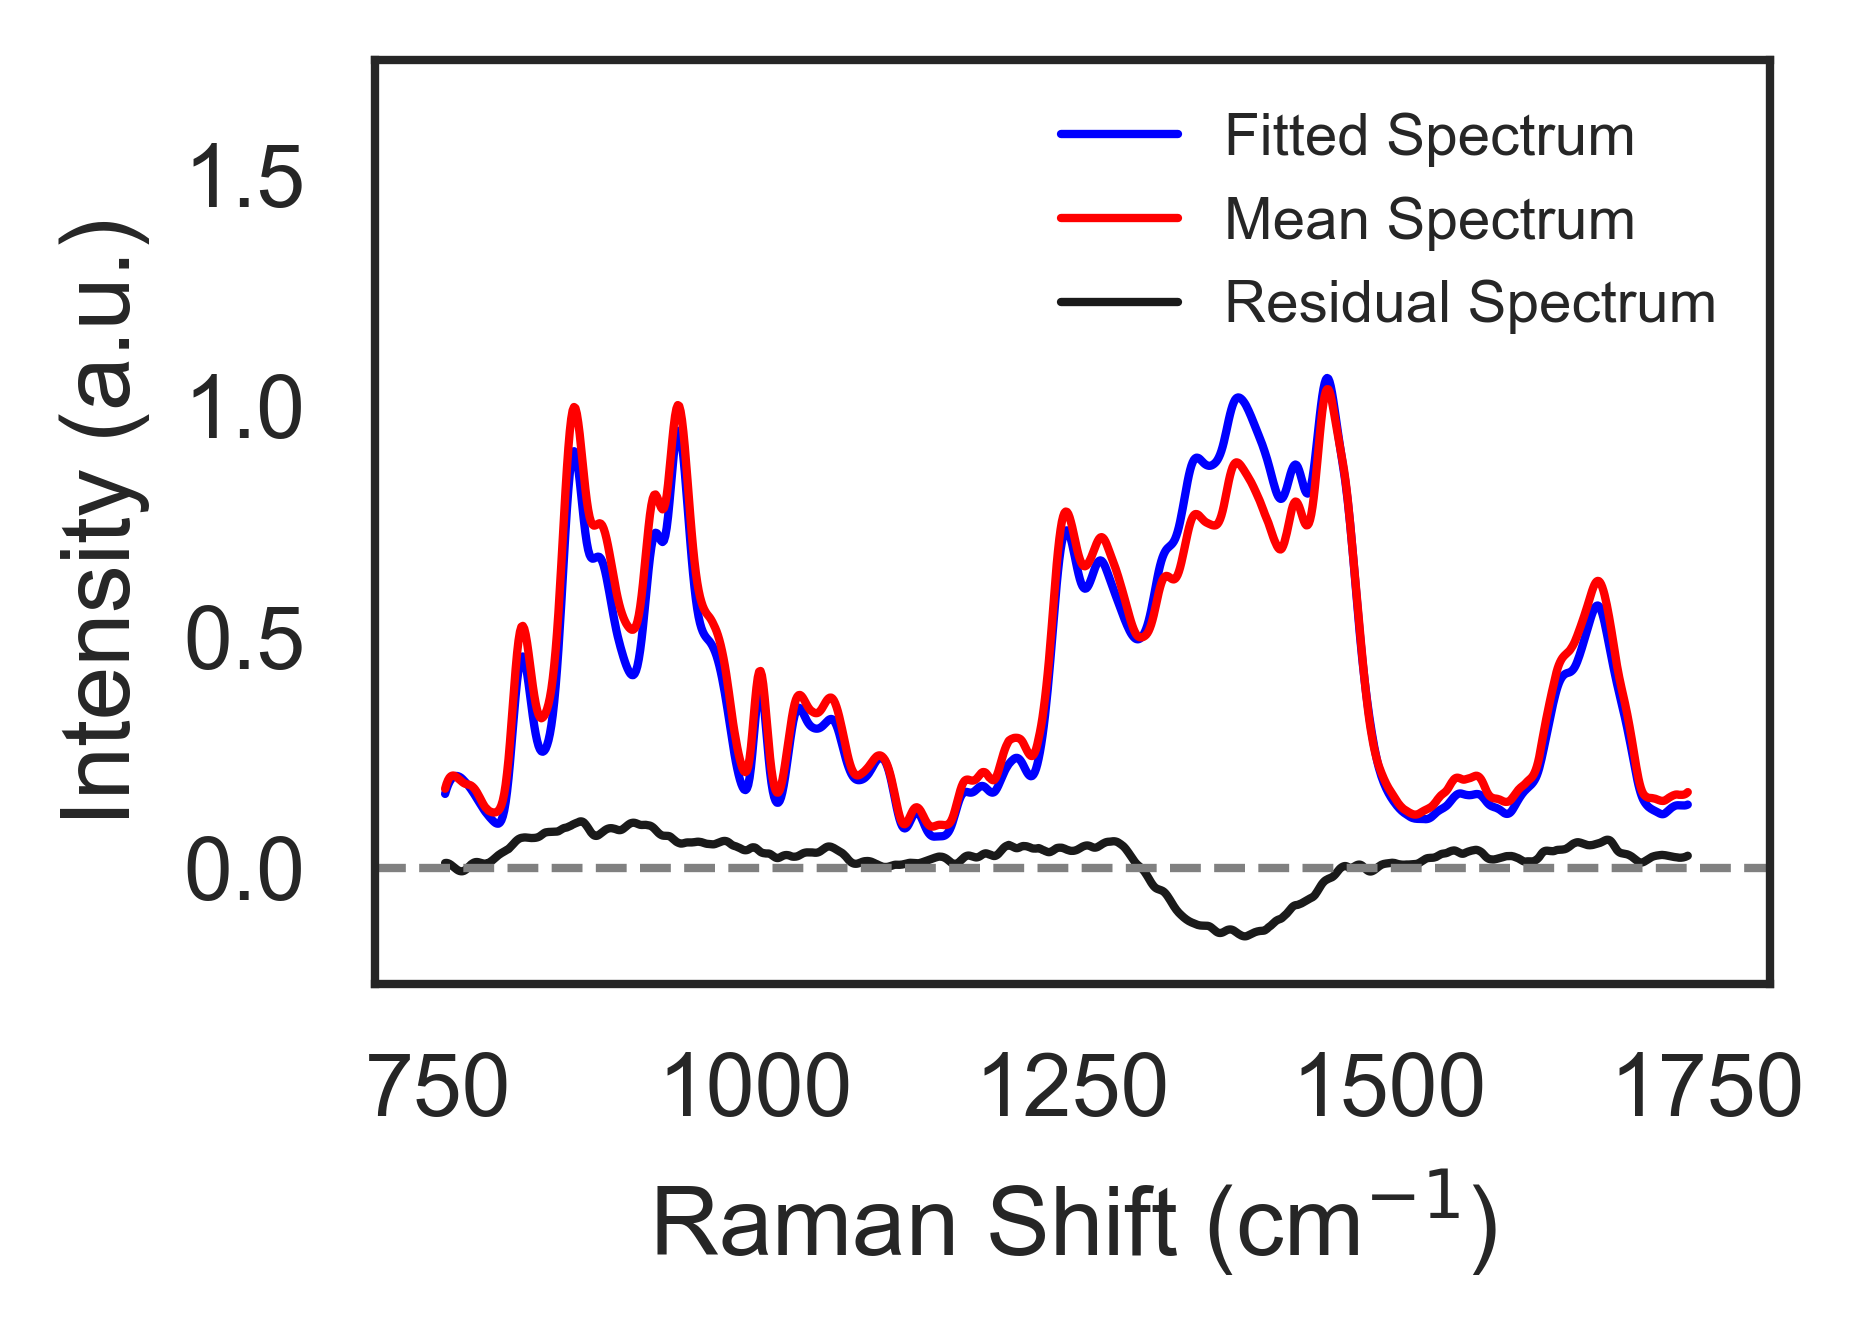

In [453]:
sns.set_theme(context = 'paper', font_scale = 1.2, style = 'white', rc={"patch.linewidth": 1.0})
plt.figure(figsize = (3, 2), dpi = 600)
sns.lineplot(
    x = sub.columns[4:],
    y = sub.iloc[3, 4:],
    lw = 1,
    color = 'blue',
    label = 'Fitted Spectrum'
)
sns.lineplot(
    x = subt.columns[4:],
    y = subt.iloc[3, 4:],
    lw = 1,
    color = 'red',
    label = 'Mean Spectrum'
)
sns.lineplot(
    x = res_m.columns[4:],
    y = res_m.iloc[3, 4:],
    color = 'k',
    lw = 1,
    label = 'Residual Spectrum'
)
plt.xlabel("Raman Shift (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.axhline(0, color = 'gray', ls = '--', lw = 1)
plt.legend(frameon = False, fontsize = 7, bbox_to_anchor = (1,1))
plt.ylim(-.25, 1.75)
plt.xlim(700, 1800)
#plt.spines['bottom'].set_visible(False)
plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\NNLS_Spectra_Para_60min.tif', dpi = 600, bbox_inches='tight')

In [375]:
sub

,sample,trt_time,752.901,754.044,755.187,756.329,757.471,758.613,759.754,760.896,...,1727.14,1728.02,1728.9,1729.78,1730.66,1731.54,1732.42,1733.29,1734.17,1735.05
0,Trt,2mins,0.100628,0.119077,0.134668,0.147617,0.158143,0.166462,0.172791,0.177350,...,0.117007,0.117116,0.117200,0.117191,0.117087,0.117037,0.117160,0.117542,0.118271,0.119432
1,Trt,20mins,0.111299,0.128054,0.142256,0.154088,0.163737,0.171389,0.177227,0.181437,...,0.122324,0.122376,0.122424,0.122380,0.122253,0.122175,0.122264,0.122603,0.123277,0.124371
2,Trt,40mins,0.126825,0.142378,0.155610,0.166679,0.175743,0.182959,0.188484,0.192476,...,0.132512,0.132505,0.132517,0.132435,0.132277,0.132167,0.132222,0.132528,0.133168,0.134229
3,Trt,60mins,0.133844,0.148386,0.160791,0.171197,0.179742,0.186563,0.191797,0.195584,...,0.136211,0.136169,0.136159,0.136054,0.135882,0.135753,0.135788,0.136067,0.136676,0.137698


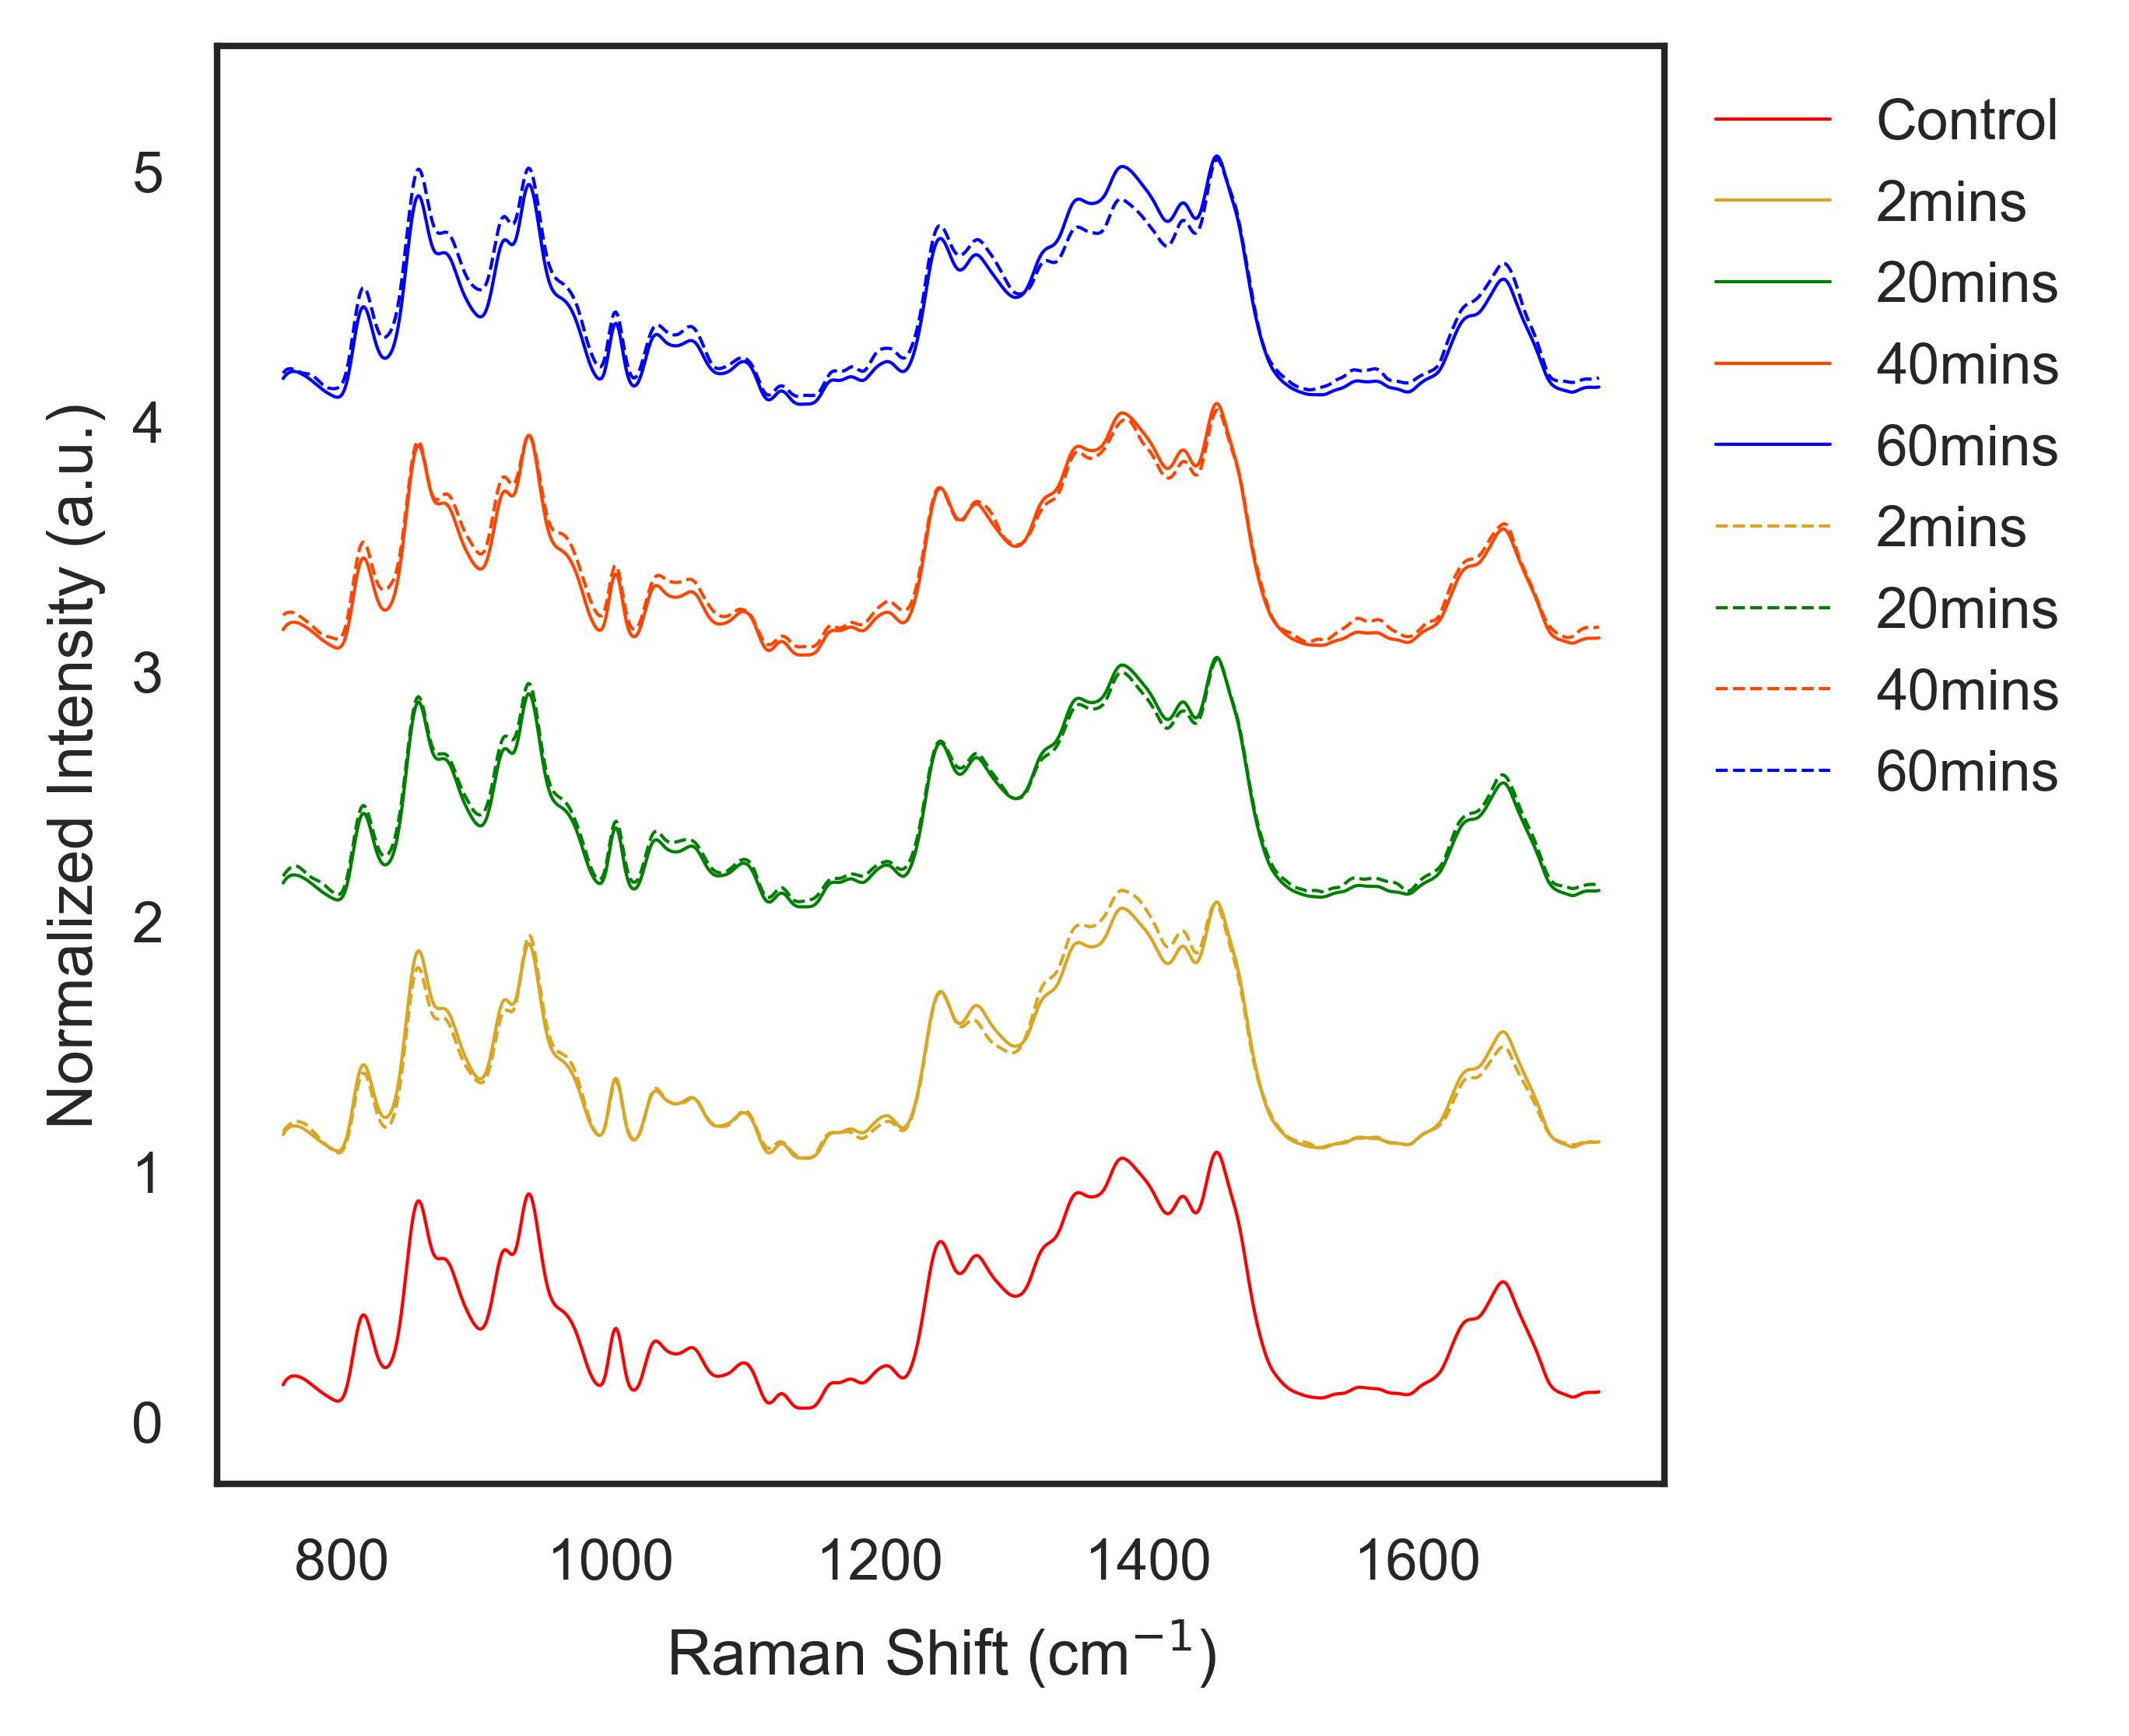

In [372]:
### Diference from singular control

sns.set_theme(style = 'white', context = 'paper')
col_map = ['orange', 'goldenrod','green', 'orangered', 'blue', 'k', 'gray', 'maroon', 'purple']
#for i in ['2mins', '20mins', '40mins', '60mins']:#, '24h'
for j in ['Para']:#, 'Para', 'Orth'
    sub = df_mean1.iloc[4:, :].reset_index(drop=True).drop(['exp', 'spectra_num'], axis=1)
    sub['trt_time'] = pd.Categorical(sub['trt_time'], categories= ['2mins',  '20mins',     '40mins',    '60mins'])
    sub = sub.sort_values('trt_time').reset_index(drop=True)

    subt = dffm.iloc[4:, :].reset_index(drop=True).drop(['exp', 'spectra_num'], axis=1)
    subt['trt_time'] = pd.Categorical(subt['trt_time'], categories= ['2mins',  '20mins',     '40mins',    '60mins'])
    subt = subt.sort_values('trt_time').reset_index(drop=True)
    #sub_ctrl = sub[(sub['sample'] == 'Ctrl') & (sub['orient'] == j)]
    #diff = sub.iloc[1:, 5:].values - sub.iloc[0, 5:].values

    plt.figure(figsize = (4, 4), dpi = 600)
    sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = sub.iloc[0, 5:].values,
            label = 'Control',
            color = 'red',
            lw = .5
        )
    for b in range(0, 4):
        sns.lineplot(
                x = sub.columns[5:].astype(float),
                y = sub.iloc[b, 5:] +(b+1), #.values +.35,
                label = sub['trt_time'][b],
                color = col_map[b+1],
                lw = .5,
                #hue = 'trt_time'
            #palette=col_map
            )
    for b in range(0, 4):
        sns.lineplot(
                x = subt.columns[5:].astype(float),
                y = subt.iloc[b, 5:] +(b+1.01), #.values +.35,
                label = subt['trt_time'][b],
                color = col_map[b+1],
                lw = .5,
                ls = '--'
                #hue = 'trt_time'
            #palette=col_map
            )
        
    
    
    '''sns.lineplot(
            x = sub.columns[5:].astype(float),
            y = diff,
            label = 'Difference',
            color = 'blue',
            lw = 1
        )'''
        #plt.title(f'Raman spectra for {j} samples at {i} treatment time')
    plt.legend(bbox_to_anchor = (1, 1), frameon = False)
    plt.xlabel("Raman Shift (cm$^{-1}$)")
    plt.ylabel("Normalized Intensity (a.u.)")
    plt.ylim(-.25, 5.5)
    #plt.axhline(0, lw = .5, color = 'black')

    '''ctrs = [857, 876, 921, 940, 1321,1245, 1270,  1381, 1033, 1062, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]
    #orth: [1033, 1062, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]#816, 857, 876, 921,  1003, 1321,857,940, 975,1100, 1127, 1245, 1270,  1381, 1426, 
    #para: [876, 1321,1245, 1270,  1381, 1033, 1062, 1167, 1207, 1344, 1451, 1545, 1575, 1636, 1663]
    for c in ctrs:
        for b in range(0, 4):
            mask = (sub.columns[5:] >= c - 5) & (sub.columns[5:] <= c + 6)

            loc_idx = sub.columns[5:][mask]
            peak_idx = sub.iloc[b, 5:][mask]

            idx_max = np.argmax(peak_idx)
            peak_wl = loc_idx[idx_max]
            int_val = peak_idx.values[idx_max]
                    #print(int_val)
            if b == 0:
                        plt.text(peak_wl + 10, int_val + .05,#.3 * (len(sub) + 0.3),
                        f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')
            else:
                        plt.text(peak_wl+10, int_val + b+.05,#.5 * (len(sub) + 0.3),
                            f'{peak_wl:.0f}', rotation=90, fontsize=5, ha='right')'''

In [470]:
coeff = pd.DataFrame(output).iloc[:, :2]
coeff = pd.concat([dff.iloc[:, :6].reset_index(drop=True), coeff], axis=1)

coeff_mean = coeff.groupby(['sample', 'trt_time']).mean(numeric_only=True).reset_index()
coeff_mean

,sample,trt_time,exp,spectra_num,coeff0,coeff1
0,Ctrl,20mins,2.025055e+07,4.900000,0.565803,0.413273
1,Ctrl,2mins,2.025056e+07,7.181818,0.793968,0.189419
2,Ctrl,40mins,2.025055e+07,5.166667,0.448634,0.551653
3,Ctrl,60mins,2.025056e+07,5.161290,0.315534,0.675204
4,Trt,20mins,2.025056e+07,4.774194,0.371183,0.657251
5,Trt,2mins,2.025056e+07,4.937500,0.625543,0.356325
6,Trt,40mins,2.025056e+07,4.774194,0.334083,0.686885
7,Trt,60mins,2.025056e+07,4.774194,0.334837,0.699174


In [471]:
coeff_mean.loc[8] = ['Ctrl', '0min', 2.025056e+07,  4.738256e+00, 6.205262e-01, 3.686963e-01]

In [472]:
coeff_mean[['coeff0', 'coeff1']] = coeff_mean[['coeff0', 'coeff1']]*100
coeff_mean

,sample,trt_time,exp,spectra_num,coeff0,coeff1
0,Ctrl,20mins,2.025055e+07,4.900000,56.580314,41.327270
1,Ctrl,2mins,2.025056e+07,7.181818,79.396823,18.941908
2,Ctrl,40mins,2.025055e+07,5.166667,44.863430,55.165285
3,Ctrl,60mins,2.025056e+07,5.161290,31.553367,67.520417
4,Trt,20mins,2.025056e+07,4.774194,37.118321,65.725128
5,Trt,2mins,2.025056e+07,4.937500,62.554348,35.632480
6,Trt,40mins,2.025056e+07,4.774194,33.408324,68.688470
7,Trt,60mins,2.025056e+07,4.774194,33.483748,69.917420
8,Ctrl,0min,2.025056e+07,4.738256,62.052620,36.869630


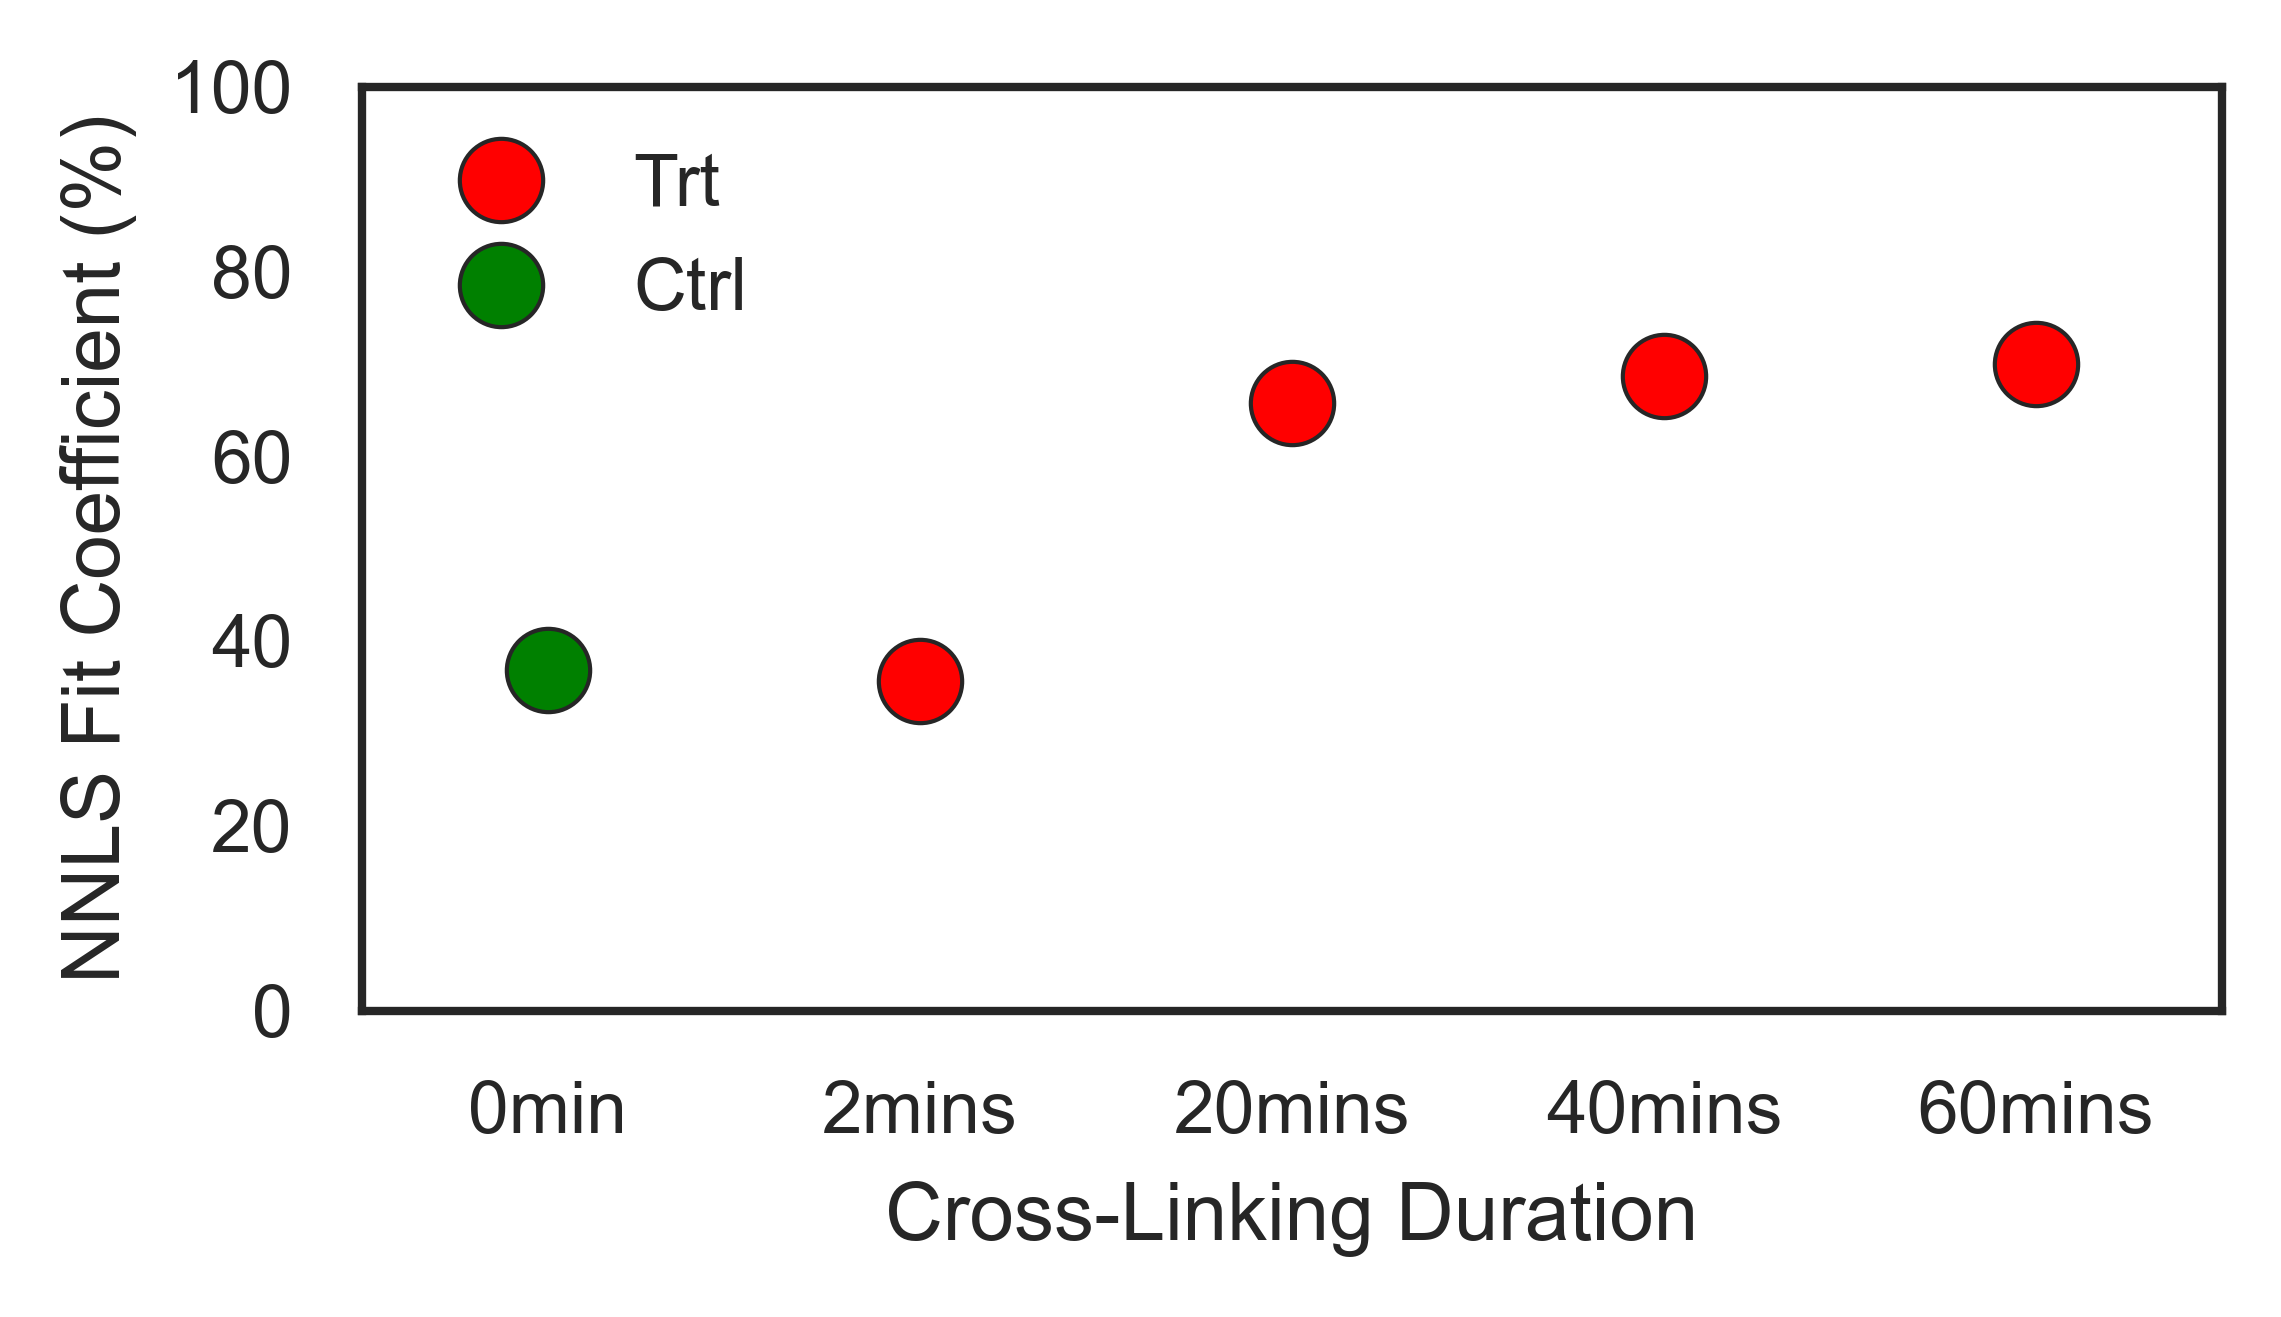

In [480]:
sns.set_theme(context = 'paper', font_scale = 1, style = 'white', rc={"patch.linewidth": 1.0})
plt.figure(figsize = (4, 2), dpi = 600)
sns.stripplot(
    x = 'trt_time',
    y = 'coeff1',
    data = coeff_mean.iloc[4:, :],
    hue = 'sample',
    palette = ['red', 'green'],
    order = ['0min', '2mins',  '20mins',     '40mins',    '60mins',],
    size=10,
    linewidth = .5
)
plt.ylabel('NNLS Fit Coefficient (%)')
plt.xlabel('Cross-Linking Duration')
plt.ylim(0, 100)
plt.legend(frameon = False, title = '',loc = 'upper left')
#plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\NNLS_Coeff%_Orth.tif', dpi = 600, bbox_inches='tight')